In [1]:
import numpy as np 
import pandas as pd 
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import warnings
warnings.filterwarnings("ignore")

# Generation Power Dataset

In [2]:
gen_df= pd.read_csv('Plant_1_Generation_Data.csv')
gen_df

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [3]:
gen_df.value_counts()

DATE_TIME         PLANT_ID  SOURCE_KEY       DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
01-06-2020 00:00  4135001   1BY6WEcLGh8j5v7  0.0       0.0       829.0        6377931.0      1
20-05-2020 01:00  4135001   1BY6WEcLGh8j5v7  0.0       0.0       0.0          6290097.0      1
20-05-2020 00:45  4135001   ZnxXDlPa8U1GXgE  0.0       0.0       0.0          6555136.0      1
                            ZoEaEvLYb1n2sOq  0.0       0.0       0.0          7130332.0      1
                            adLQvlD726eNBSB  0.0       0.0       0.0          6304513.0      1
                                                                                            ..
11-06-2020 22:45  4135001   McdE0feGgRqW7Ca  0.0       0.0       5750.0       7367373.0      1
                            VHMLBKoKgIrUVDU  0.0       0.0       5716.0       7415011.0      1
                            WRmjgnKYAwPKWDb  0.0       0.0       5619.0       7232986.0      1
                            YxYtjZvoooNbGkE  0.0       

In [4]:
gen_df.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [5]:
gen_df['DATE_TIME'] =  pd.to_datetime(gen_df['DATE_TIME'])


In [6]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [7]:
gen_df['DATE_TIME']

0       2020-05-15 00:00:00
1       2020-05-15 00:00:00
2       2020-05-15 00:00:00
3       2020-05-15 00:00:00
4       2020-05-15 00:00:00
                ...        
68773   2020-06-17 23:45:00
68774   2020-06-17 23:45:00
68775   2020-06-17 23:45:00
68776   2020-06-17 23:45:00
68777   2020-06-17 23:45:00
Name: DATE_TIME, Length: 68778, dtype: datetime64[ns]

In [8]:
gen_df.describe()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,2020-06-01 08:02:49.458256896,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
min,2020-05-15 00:00:00,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,2020-05-24 00:45:00,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,2020-06-01 14:30:00,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,2020-06-09 20:00:00,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,2020-06-17 23:45:00,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06
std,NaN,0.0,4036.457169,394.396439,3145.178309,4.162720e+05


In [9]:
gen_df.drop(columns=['TOTAL_YIELD'], axis=1, inplace=True)

# Weather Dataset

In [10]:
wth_df=pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
wth_df

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [11]:
wth_df.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [12]:
wth_df.value_counts()

DATE_TIME            PLANT_ID  SOURCE_KEY       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
2020-05-15 00:00:00  4135001   HmiyD2TTLFNqkNe  25.184316            22.857507           0.000000       1
2020-06-06 20:45:00  4135001   HmiyD2TTLFNqkNe  22.187079            20.146041           0.000000       1
2020-06-06 21:15:00  4135001   HmiyD2TTLFNqkNe  22.210578            20.432326           0.000000       1
2020-06-06 21:30:00  4135001   HmiyD2TTLFNqkNe  22.211206            20.508386           0.000000       1
2020-06-06 21:45:00  4135001   HmiyD2TTLFNqkNe  22.218504            20.464101           0.000000       1
                                                                                                       ..
2020-05-26 17:45:00  4135001   HmiyD2TTLFNqkNe  30.519482            30.251396           0.035266       1
2020-05-26 18:00:00  4135001   HmiyD2TTLFNqkNe  29.594161            29.093567           0.026555       1
2020-05-26 18:15:00  4135001   HmiyD2TTLFNqkNe  29.

In [13]:
wth_df['DATE_TIME']=pd.to_datetime(wth_df['DATE_TIME'])

In [14]:
wth_df['DATE_TIME']

0      2020-05-15 00:00:00
1      2020-05-15 00:15:00
2      2020-05-15 00:30:00
3      2020-05-15 00:45:00
4      2020-05-15 01:00:00
               ...        
3177   2020-06-17 22:45:00
3178   2020-06-17 23:00:00
3179   2020-06-17 23:15:00
3180   2020-06-17 23:30:00
3181   2020-06-17 23:45:00
Name: DATE_TIME, Length: 3182, dtype: datetime64[ns]

In [15]:
wth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


# Merged Dataset

In [16]:
df= pd.merge(gen_df.drop(columns=['PLANT_ID']),
             wth_df.drop(columns=['PLANT_ID', 'SOURCE_KEY']), 
             on='DATE_TIME'
             )

df.head(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,25.184316,22.857507,0.0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,25.184316,22.857507,0.0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,25.184316,22.857507,0.0
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,25.184316,22.857507,0.0
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,25.184316,22.857507,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   SOURCE_KEY           68774 non-null  object        
 2   DC_POWER             68774 non-null  float64       
 3   AC_POWER             68774 non-null  float64       
 4   DAILY_YIELD          68774 non-null  float64       
 5   AMBIENT_TEMPERATURE  68774 non-null  float64       
 6   MODULE_TEMPERATURE   68774 non-null  float64       
 7   IRRADIATION          68774 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 4.2+ MB


In [18]:
df.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,68774,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000
mean,2020-06-01 08:02:38.161514240,3147.177450,307.778375,3295.834644,25.558521,31.244997,0.232305
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,20.398505,18.140415,0.000000
25%,2020-05-24 00:33:45,0.000000,0.000000,0.000000,22.724491,21.123944,0.000000
50%,2020-06-01 14:15:00,428.571429,41.450000,2658.473214,24.670178,24.818984,0.031620
75%,2020-06-09 20:00:00,6365.468750,623.561161,6274.000000,27.960429,41.693659,0.454880
max,2020-06-17 23:45:00,14471.125000,1410.950000,9163.000000,35.252486,65.545714,1.221652
std,NaN,4036.441826,394.394865,3145.220597,3.361300,12.308283,0.301948


In [19]:
df.set_index('DATE_TIME', inplace=True)

In [20]:
df.head(5)

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,,,
2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,25.184316,22.857507,0.0
2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,25.184316,22.857507,0.0
2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,25.184316,22.857507,0.0
2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,25.184316,22.857507,0.0
2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,25.184316,22.857507,0.0


In [21]:
df.iloc[-1]

SOURCE_KEY             zVJPv84UY57bAof
DC_POWER                           0.0
AC_POWER                           0.0
DAILY_YIELD                     5910.0
AMBIENT_TEMPERATURE          21.909288
MODULE_TEMPERATURE           20.427972
IRRADIATION                        0.0
Name: 2020-06-17 23:45:00, dtype: object

In [22]:
df.isnull().sum()

SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [23]:
df['AMBIENT_TEMPERATURE']=df['AMBIENT_TEMPERATURE'].astype(int)
df['MODULE_TEMPERATURE']=df['MODULE_TEMPERATURE'].astype(int)

In [24]:
df.dtypes

SOURCE_KEY              object
DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
AMBIENT_TEMPERATURE      int32
MODULE_TEMPERATURE       int32
IRRADIATION            float64
dtype: object

In [25]:
df.index

DatetimeIndex(['2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               ...
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=68774, freq=None)

In [26]:
df['SOURCE_KEY'].unique()

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

In [27]:
df['SOURCE_KEY'].nunique()

22

In [28]:
encoder = LabelEncoder()

encoded_column = encoder.fit_transform(df[['SOURCE_KEY']])
df['SOURCE_KEY_NO'] = encoded_column

df.head(5)

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_NO
DATE_TIME,,,,,,,,
2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,25,22,0.0,0
2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,25,22,0.0,1
2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,25,22,0.0,2
2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,25,22,0.0,3
2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,25,22,0.0,4


In [29]:
df['MODULE_TEMPERATURE'].unique()

array([22, 21, 23, 24, 27, 28, 29, 31, 35, 40, 39, 45, 46, 52, 47, 49, 44,
       50, 55, 54, 43, 41, 36, 34, 30, 25, 20, 19, 33, 38, 48, 37, 32, 26,
       60, 63, 61, 56, 53, 42, 51, 18, 58, 59, 57, 62, 65])

In [30]:
df['AMBIENT_TEMPERATURE'].unique()

array([25, 24, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 22, 21, 35, 20])

In [31]:
df['SOURCE_KEY_NO'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21,  7])

In [32]:
df['IRRADIATION'].nunique()

1755

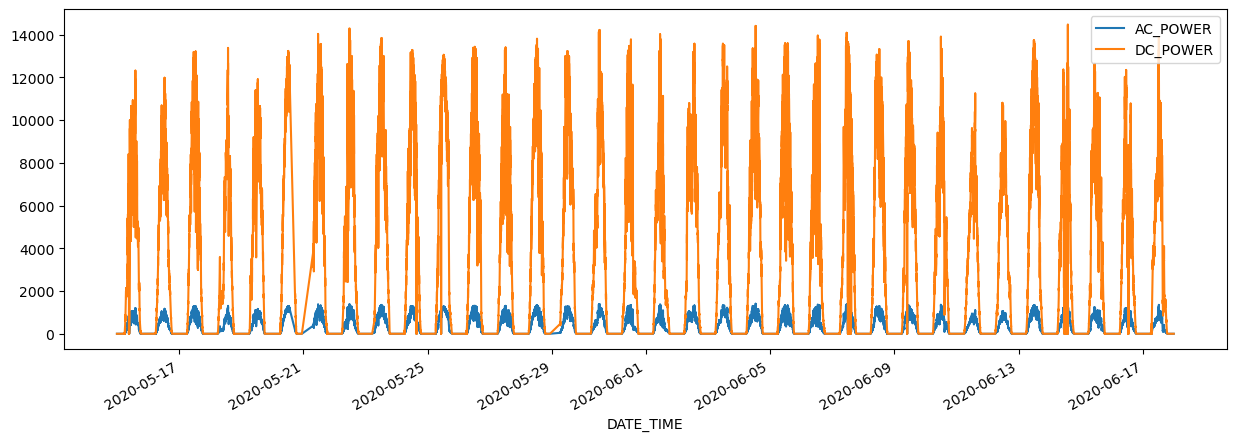

In [33]:
df[['AC_POWER', 'DC_POWER']].plot(figsize=(15, 5));

<Axes: xlabel='DATE_TIME'>

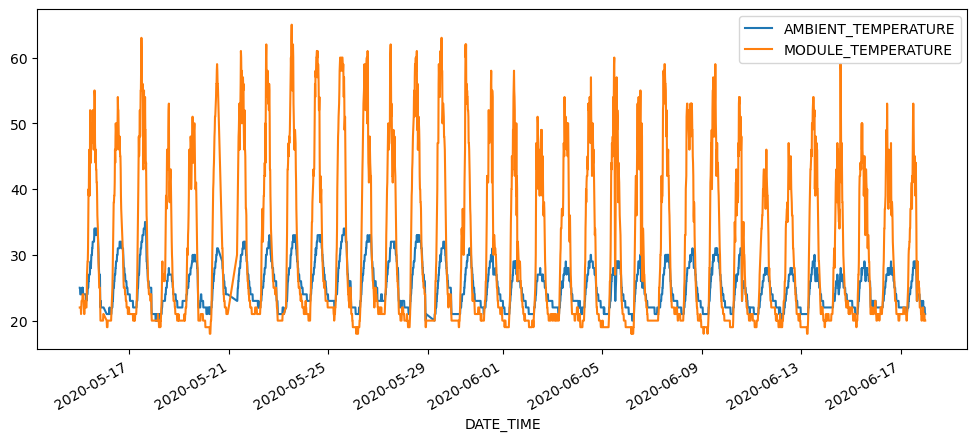

In [34]:
df[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']].plot(figsize=(12,5))

# Data Split

In [35]:
x=df.drop(columns=['AC_POWER','SOURCE_KEY','DAILY_YIELD','SOURCE_KEY_NO'], axis=1)
y=df['AC_POWER'].copy()

In [36]:
x

,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,
2020-05-15 00:00:00,0.0,25,22,0.0
2020-05-15 00:00:00,0.0,25,22,0.0
2020-05-15 00:00:00,0.0,25,22,0.0
2020-05-15 00:00:00,0.0,25,22,0.0
2020-05-15 00:00:00,0.0,25,22,0.0
...,...,...,...,...
2020-06-17 23:45:00,0.0,21,20,0.0
2020-06-17 23:45:00,0.0,21,20,0.0
2020-06-17 23:45:00,0.0,21,20,0.0


**Train Split:**

In [37]:
x_train=x.loc[: '2020-06-10 23:45:00']
y_train=y.loc[: '2020-06-10 23:45:00']

In [38]:
x_train

,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,
2020-05-15 00:00:00,0.0,25,22,0.0
2020-05-15 00:00:00,0.0,25,22,0.0
2020-05-15 00:00:00,0.0,25,22,0.0
2020-05-15 00:00:00,0.0,25,22,0.0
2020-05-15 00:00:00,0.0,25,22,0.0
...,...,...,...,...
2020-06-10 23:45:00,0.0,22,21,0.0
2020-06-10 23:45:00,0.0,22,21,0.0
2020-06-10 23:45:00,0.0,22,21,0.0


In [39]:
pd.DataFrame(y_train)

,AC_POWER
DATE_TIME,
2020-05-15 00:00:00,0.0
2020-05-15 00:00:00,0.0
2020-05-15 00:00:00,0.0
2020-05-15 00:00:00,0.0
2020-05-15 00:00:00,0.0
...,...
2020-06-10 23:45:00,0.0
2020-06-10 23:45:00,0.0
2020-06-10 23:45:00,0.0


**Test Split:**

In [40]:
x_test=x.loc['2020-06-11 00:00:00': ]
y_test=y.loc['2020-06-11 00:00:00': ]

In [41]:
x_test

,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,
2020-06-11 00:00:00,0.0,22,21,0.0
2020-06-11 00:00:00,0.0,22,21,0.0
2020-06-11 00:00:00,0.0,22,21,0.0
2020-06-11 00:00:00,0.0,22,21,0.0
2020-06-11 00:00:00,0.0,22,21,0.0
...,...,...,...,...
2020-06-17 23:45:00,0.0,21,20,0.0
2020-06-17 23:45:00,0.0,21,20,0.0
2020-06-17 23:45:00,0.0,21,20,0.0


In [42]:
pd.DataFrame(y_test)

,AC_POWER
DATE_TIME,
2020-06-11 00:00:00,0.0
2020-06-11 00:00:00,0.0
2020-06-11 00:00:00,0.0
2020-06-11 00:00:00,0.0
2020-06-11 00:00:00,0.0
...,...
2020-06-17 23:45:00,0.0
2020-06-17 23:45:00,0.0
2020-06-17 23:45:00,0.0


# ML Models:

**Linear Regression:**

In [43]:
lr_reg= LinearRegression()
lr_reg.fit(x_train, y_train)

LinearRegression()

In [44]:
lr_pred=lr_reg.predict(x_test)
lr_pred

array([0.2766959 , 0.2766959 , 0.2766959 , ..., 0.22505675, 0.22505675,
       0.22505675])

In [45]:
print('training result:')
print('===============================')

# Assuming lr_pred_train is the predictions on the training set
lr_pred_train = lr_reg.predict(x_train)

mae_train = mean_absolute_error(y_train, lr_pred_train)
mse_train = mean_squared_error(y_train, lr_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, lr_pred_train)

print("Mean Absolute Error (MAE) - Training:", mae_train)
print("Mean Square Error (MSE) - Training:", mse_train)
print("Root Mean Squared Error (RMSE) - Training:", rmse_train)
print("R2 - Training:", r2_train * 100)


training result:
Mean Absolute Error (MAE) - Training: 0.6616197999740633
Mean Square Error (MSE) - Training: 1.108535703949292
Root Mean Squared Error (RMSE) - Training: 1.0528702217981531
R2 - Training: 99.99931719852356


In [46]:
print('testing result:')
print('===============================')

mae=mean_absolute_error(y_test,lr_pred)
mse=mean_squared_error(y_test, lr_pred)
rmse= np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Square Error (MAE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2- Testing: ", r2*100)


testing result:
Mean Absolute Error (MAE): 0.678449913107723
Mean Square Error (MAE): 1.0881211373378903
Root Mean Squared Error (RMSE): 1.0431304507768384
R2- Testing:  99.99915699193238


In [47]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred})
results_df

,Actual,Predicted
DATE_TIME,,
2020-06-11 00:00:00,0.0,0.276696
2020-06-11 00:00:00,0.0,0.276696
2020-06-11 00:00:00,0.0,0.276696
2020-06-11 00:00:00,0.0,0.276696
2020-06-11 00:00:00,0.0,0.276696
...,...,...
2020-06-17 23:45:00,0.0,0.225057
2020-06-17 23:45:00,0.0,0.225057
2020-06-17 23:45:00,0.0,0.225057


**Ridge:**

In [48]:
alpha = 1.0  # Regularization strength (adjust as needed)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(x_train, y_train)

Ridge()

In [49]:
print('training result:')
print('===============================')

# Assuming lr_pred_train is the predictions on the training set
r_pred_train = ridge_model.predict(x_train)

mae_train = mean_absolute_error(y_train, r_pred_train)
mse_train = mean_squared_error(y_train, r_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, r_pred_train)

print("Mean Absolute Error (MAE) - Training:", mae_train)
print("Mean Square Error (MSE) - Training:", mse_train)
print("Root Mean Squared Error (RMSE) - Training:", rmse_train)
print("R2 - Training:", r2_train * 100)


training result:
Mean Absolute Error (MAE) - Training: 0.6617800209579783
Mean Square Error (MSE) - Training: 1.108541845837631
Root Mean Squared Error (RMSE) - Training: 1.052873138529819
R2 - Training: 99.99931719474046


In [50]:
r_pred=ridge_model.predict(x_test)
r_pred


array([0.27620063, 0.27620063, 0.27620063, ..., 0.2244946 , 0.2244946 ,
       0.2244946 ])

In [51]:
print('testing result:')
print('===============================')

mae=mean_absolute_error(y_test,r_pred)
mse=mean_squared_error(y_test, r_pred)
rmse= np.sqrt(mse)
r2 = r2_score(y_test, r_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Square Error (MAE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2- Testing: ", r2*100)


testing result:
Mean Absolute Error (MAE): 0.6786291171179187
Mean Square Error (MAE): 1.0886896333795666
Root Mean Squared Error (RMSE): 1.0434029103752618
R2- Testing:  99.99915655149726


In [52]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
results_df.sample(10)

,Actual,Predicted
DATE_TIME,,
2020-06-14 18:15:00,24.257143,24.926336
2020-06-14 14:45:00,586.887500,585.665754
2020-06-13 15:45:00,680.525000,679.657824
2020-06-12 14:15:00,702.957143,701.659010
2020-06-12 20:15:00,0.000000,0.228959
2020-06-15 05:00:00,0.000000,0.224495
2020-06-14 15:15:00,990.412500,991.428487
2020-06-12 12:45:00,785.800000,784.370472
2020-06-13 21:45:00,0.000000,0.177253


<Axes: xlabel='DATE_TIME'>

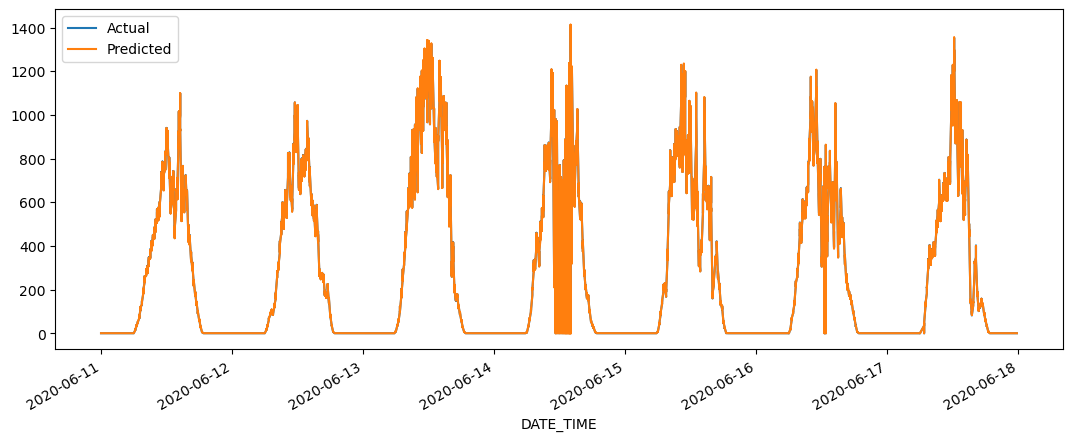

In [53]:
results_df.plot(figsize=(13,5))

# Decision tree: 


In [54]:
dt_reg= DecisionTreeRegressor()
grid = {
    'max_depth': [3, 5, 7 , 9]
} # grid search to find the optimal parameter that gives better performance
grid_search = GridSearchCV(dt_reg, grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_


{'max_depth': 9}

In [55]:
print('training result:')
print('===============================')

# Assuming lr_pred_train is the predictions on the training set
dt_pred_train = grid_search.predict(x_train)

mae_train = mean_absolute_error(y_train, dt_pred_train)
mse_train = mean_squared_error(y_train, dt_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, dt_pred_train)

print("Mean Absolute Error (MAE) - Training:", mae_train)
print("Mean Square Error (MSE) - Training:", mse_train)
print("Root Mean Squared Error (RMSE) - Training:", rmse_train)
print("R2 - Training:", r2_train * 100)


training result:
Mean Absolute Error (MAE) - Training: 0.3892977089254582
Mean Square Error (MSE) - Training: 0.5622465045994223
Root Mean Squared Error (RMSE) - Training: 0.7498309840220143
R2 - Training: 99.99965368481854


In [56]:
dt_pred=grid_search.predict(x_test)
dt_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
print('testing result:')
print('===============================')

mae=mean_absolute_error(y_test,dt_pred)
mse=mean_squared_error(y_test, dt_pred)
rmse= np.sqrt(mse)
r2 = r2_score(y_test, dt_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Square Error (MAE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2- Testing: ", r2*100)


testing result:
Mean Absolute Error (MAE): 0.39748166967252
Mean Square Error (MAE): 0.7561685407254329
Root Mean Squared Error (RMSE): 0.8695795194951598
R2- Testing:  99.99941416800166


In [58]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': dt_pred})
results_df.sample(10)

,Actual,Predicted
DATE_TIME,,
2020-06-11 07:45:00,195.271429,196.131312
2020-06-14 03:00:00,0.000000,0.000000
2020-06-14 01:15:00,0.000000,0.000000
2020-06-14 09:45:00,830.342857,828.585492
2020-06-11 00:45:00,0.000000,0.000000
2020-06-16 19:30:00,0.000000,0.000000
2020-06-13 23:45:00,0.000000,0.000000
2020-06-11 06:15:00,15.671429,15.452473
2020-06-14 16:00:00,557.912500,559.018177


# Random Forest: 

In [59]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [60]:
print('training result:')
print('===============================')

# Assuming lr_pred_train is the predictions on the training set
rf_pred_train = rf.predict(x_train)

mae_train = mean_absolute_error(y_train, rf_pred_train)
mse_train = mean_squared_error(y_train, rf_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, rf_pred_train)

print("Mean Absolute Error (MAE) - Training:", mae_train)
print("Mean Square Error (MSE) - Training:", mse_train)
print("Root Mean Squared Error (RMSE) - Training:", rmse_train)
print("R2 - Training:", r2_train * 100)


training result:
Mean Absolute Error (MAE) - Training: 0.04942549252411343
Mean Square Error (MSE) - Training: 0.05716204200200001
Root Mean Squared Error (RMSE) - Training: 0.23908584651124792
R2 - Training: 99.99996479109645


In [61]:
rf_pred= rf.predict(x_test)
rf_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [62]:
print('testing result:')
print('===============================')

mae=mean_absolute_error(y_test,rf_pred)
mse=mean_squared_error(y_test, rf_pred)
rmse= np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Square Error (MAE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2- Testing: ", r2*100)


testing result:
Mean Absolute Error (MAE): 0.12306166784956374
Mean Square Error (MAE): 0.5153090294959167
Root Mean Squared Error (RMSE): 0.7178502834825078
R2- Testing:  99.99960077085696


In [63]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': dt_pred})
results_df.sample(10)

,Actual,Predicted
DATE_TIME,,
2020-06-17 23:45:00,0.000000,0.000000
2020-06-12 09:15:00,584.837500,585.041769
2020-06-12 01:15:00,0.000000,0.000000
2020-06-15 09:00:00,811.312500,809.887693
2020-06-17 06:45:00,45.450000,45.172223
2020-06-16 19:45:00,0.000000,0.000000
2020-06-17 16:45:00,115.575000,116.007507
2020-06-17 03:15:00,0.000000,0.000000
2020-06-11 03:30:00,0.000000,0.000000


# Saving the best model

In [64]:
import pickle
pickle.dump(ridge_model, open('ridge.sav', 'wb'))

In [65]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54034 entries, 2020-05-15 00:00:00 to 2020-06-10 23:45:00
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DC_POWER             54034 non-null  float64
 1   AMBIENT_TEMPERATURE  54034 non-null  int32  
 2   MODULE_TEMPERATURE   54034 non-null  int32  
 3   IRRADIATION          54034 non-null  float64
dtypes: float64(2), int32(2)
memory usage: 1.6 MB
